In [55]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [144]:
with open('input/input_15ex.txt') as file:
    lines = [line.rstrip('\n') for line in file]

In [145]:
examp = []
for line in lines:
    row = [int(c) for c in line]
    examp.append(row)

examp = np.array(examp)

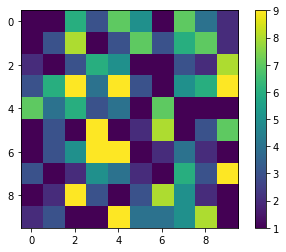

In [146]:
plt.imshow(examp)
plt.colorbar()

## solution attempt

In [42]:
np.eye(10, k=-8)[::-1]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [151]:
map1 = copy.deepcopy(examp)
map1[0,0] = 0 # only count when enter
map1

array([[0, 1, 6, 3, 7, 5, 1, 7, 4, 2],
       [1, 3, 8, 1, 3, 7, 3, 6, 7, 2],
       [2, 1, 3, 6, 5, 1, 1, 3, 2, 8],
       [3, 6, 9, 4, 9, 3, 1, 5, 6, 9],
       [7, 4, 6, 3, 4, 1, 7, 1, 1, 1],
       [1, 3, 1, 9, 1, 2, 8, 1, 3, 7],
       [1, 3, 5, 9, 9, 1, 2, 4, 2, 1],
       [3, 1, 2, 5, 4, 2, 1, 6, 3, 9],
       [1, 2, 9, 3, 1, 3, 8, 5, 2, 1],
       [2, 3, 1, 1, 9, 4, 4, 5, 8, 1]])

In [152]:
# range(-8, 10):

map_ = map1
for i in range(-8, 10):
    to_check = np.eye(10, k=i)[::-1] == 1
    positions = np.where(to_check)
    pos_row, pos_col = positions
    
    # print(examp[to_check]) # ex: [6, 3, 2]
    # print(positions) # ex: (array([0, 1, 2]), array([2, 1, 0]))
    
    for kpos, node in enumerate(map_[to_check]):
        least_value = checkNode(node, pos_row[kpos], pos_col[kpos])
        map1[pos_row[kpos], pos_col[kpos]] = least_value

In [153]:
map1

array([[ 0,  1,  7, 10, 17, 22, 23, 30, 34, 36],
       [ 1,  4, 12, 11, 14, 21, 24, 30, 37, 38],
       [ 3,  4,  7, 13, 18, 19, 20, 23, 25, 33],
       [ 6, 10, 16, 17, 26, 22, 21, 26, 31, 40],
       [13, 14, 20, 20, 24, 23, 28, 27, 28, 29],
       [14, 17, 18, 27, 25, 25, 33, 28, 31, 36],
       [15, 18, 23, 32, 34, 26, 28, 32, 33, 34],
       [18, 19, 21, 26, 30, 28, 29, 35, 36, 43],
       [19, 21, 30, 29, 30, 31, 37, 40, 38, 39],
       [21, 24, 25, 26, 35, 35, 39, 44, 46, 40]])

In [150]:
def checkNode(nodeval, pos_row, pos_col):
    totvalue = 999
    
    # get from left and up positions
    pre_left_pos = (pos_row, pos_col - 1)
    pre_up_pos = (pos_row - 1, pos_col)
    
    # get left pos value
    if -1 in pre_left_pos:
        pre_left = 999
    else:
        pre_left = map_[pre_left_pos]
    
    # get up pos value
    if -1 in pre_up_pos:
        pre_up = 999
    else:
        pre_up = map_[pre_up_pos]
    
    post_left = pre_left + nodeval
    post_up = pre_up + nodeval
    
    totval = min(totvalue, post_left, post_up)
    
    return totval

In [154]:
assert checkNode(3, 1, 1) == 4
assert checkNode(6, 0, 2) == 7

## on real thing

In [157]:
with open('input/input_15.txt') as file:
    lines = [line.rstrip('\n') for line in file]

In [158]:
inpot = []
for line in lines:
    row = [int(c) for c in line]
    inpot.append(row)

inpot = np.array(inpot)

In [171]:
map0 = copy.deepcopy(inpot)
map0[0,0] = 0 # only count when enter
map0

array([[0, 4, 9, ..., 4, 9, 5],
       [7, 2, 6, ..., 9, 2, 5],
       [5, 1, 9, ..., 8, 9, 7],
       ...,
       [4, 5, 6, ..., 5, 9, 2],
       [9, 2, 9, ..., 2, 7, 3],
       [4, 7, 8, ..., 7, 9, 6]])

In [172]:
# range(-8, 10):

map_ = map0
for i in range(-98, 100):
    to_check = np.eye(100, k=i)[::-1] == 1
    positions = np.where(to_check)
    pos_row, pos_col = positions
    
    # print(examp[to_check]) # ex: [6, 3, 2]
    # print(positions) # ex: (array([0, 1, 2]), array([2, 1, 0]))
    
    for kpos, node in enumerate(map_[to_check]):
        least_value = checkNode(node, pos_row[kpos], pos_col[kpos])
        map_[pos_row[kpos], pos_col[kpos]] = least_value

In [173]:
map0

array([[  0,   4,  13, ..., 553, 562, 567],
       [  7,   6,  12, ..., 540, 542, 547],
       [ 12,   7,  16, ..., 529, 538, 545],
       ...,
       [590, 566, 504, ..., 655, 664, 666],
       [599, 568, 513, ..., 657, 664, 667],
       [603, 575, 521, ..., 664, 673, 673]])

## part 2

In [254]:
def increment(val, incr):
    
    if val + incr > 9:
        val = (val + incr) - 9
    else: 
        val += incr
    
    return val

In [255]:
assert increment(8, 7) == 6
assert increment(8, 3) == 2

In [201]:
test = np.ones((3, 3))

In [258]:
incrementarr = np.vectorize(increment)

In [264]:
assert (incrementarr(np.array([9,8,5]), 4) == np.array([4, 3, 9])).all()

In [204]:
# 8 9 1 2 3        
# 9 1 2 3 4
# 1 2 3 4 5
# 2 3 4 5 6
# 3 4 5 6 7

# ---increment map---
# 0 1 2 3 4
# 1 2 2 4 5
# 2 3 4 5 6
# 3 4 5 6 7
# 4 5 6 7 8

In [214]:
tt = np.array([8])

In [287]:
start = np.array([], dtype='uint8')
rowstack_list = []
colstack_list = []

inc_start = 0
inc_end = 5
for i in range(5):
    
    for j in range(inc_start, inc_end):
        incremented = incrementarr(tt, j)
        rowstack_list.append(incremented)
    
    rowstack = np.hstack(rowstack_list)
    colstack_list.append(rowstack)
    
    rowstack_list = []
    rowstack = np.array([]) # reset rowstack and list for new rowline
    
    inc_start += 1
    inc_end += 1

In [288]:
np.vstack([colstack_list])

array([[8, 9, 1, 2, 3],
       [9, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6],
       [3, 4, 5, 6, 7]])

In [232]:
np.vstack([tt, tt])

array([[8],
       [8]])

In [217]:
np.hstack([start, tt])

array([8.])

In [236]:
stack

array([], shape=(6, 0), dtype=uint8)

In [240]:
np.vstack([np.array([1, 2]), np.array([3, 4])]).shape

(2, 2)

In [242]:
list(range(1, 6))

[1, 2, 3, 4, 5]